# Import Dataset

In [ ]:
import os
import matplotlib.pyplot as plt

main_dir = "dataset/brain_tumor_dataset"

categories = os.listdir(main_dir)
print(categories)

['glioma', 'healthy', 'meningioma', 'pituitary']


In [ ]:
for category in categories:
  dir = os.path.join(main_dir, category)
  num_images = len([f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))])

  print(f"Label {category} ada total {num_images} gambar")

Label glioma ada total 1621 gambar
Label healthy ada total 2000 gambar
Label meningioma ada total 1645 gambar
Label pituitary ada total 1757 gambar


# Pre-processing

In [ ]:
import cv2
import numpy as np

IMG_SIZE = 224
data = []
labels = []

In [ ]:
for category in categories:
  folder_path = os.path.join(main_dir, category)
  label = categories.index(category)

  #print(os.listdir(folder_path))

  for img_name in os.listdir(folder_path):
    try:
      img_path = os.path.join(folder_path, img_name)
      img = cv2.imread(img_path, cv2.IMREAD_COLOR)

      resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

      data.append(resized_img)
      labels.append(label)

    except Exception as e:
      print(f"Error loading imange {img_path}")

In [ ]:
X = np.array(data)
y = np.array(labels)

print(f"Preprocessing finished. Data shape: {X.shape}")

Preprocessing finished. Data shape: (7023, 224, 224, 3)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(f"Train size : {len(X_train)}")
print(f"Test size : {len(X_test)}")

Train size : 5618
Test size : 1405


# Train

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

train_generator = datagen.flow_from_directory(
    main_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "sparse",
    subset = "training"
)

val_generator = datagen.flow_from_directory(
    main_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "sparse",
    subset = "validation"
)

Found 5619 images belonging to 4 classes.
Found 1404 images belonging to 4 classes.


In [ ]:
from tensorflow.keras import layers, models

# Building the CNN
model_2_layers = models.Sequential([
    # Input layer + First Convolution
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolution
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Turning 2D maps into a 1D vector
    layers.Flatten(),

    # Hidden Layer
    layers.Dense(128, activation='relu'),
    # Output Layer (4 classes)
    layers.Dense(4, activation='softmax')
])

# Compile the model
model_2_layers.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train using the generator
history_2_layers = model_2_layers.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 48s 240ms/step - accuracy: 0.5994 - loss: 1.2104 - val_accuracy: 0.8967 - val_loss: 0.3010
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 204ms/step - accuracy: 0.9276 - loss: 0.2074 - val_accuracy: 0.9110 - val_loss: 0.2362
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 35s 196ms/step - accuracy: 0.9741 - loss: 0.0745 - val_accuracy: 0.9323 - val_loss: 0.2325
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 35s 200ms/step - accuracy: 0.9919 - loss: 0.0315 - val_accuracy: 0.9373 - val_loss: 0.2360
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 202ms/step - accuracy: 0.9899 - loss: 0.0297 - val_accuracy: 0.9480 - val_loss: 0.1970
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 35s 198ms/step - accuracy: 0.9955 - loss: 0.0164 - val_accuracy: 0.9480 - val_loss: 0.2672
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 35s 197ms/step - accuracy: 0.9906 - loss: 0.0272 - val_accuracy: 0.9366 - val_loss: 0.2651
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 202ms/step - accuracy: 0.9962 - loss: 0

In [10]:
model_3_layers = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Adding a 3rd layer to help with the complex POV variety
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model_3_layers.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# Train using the generator
history_3_layers = model_3_layers.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 46s 236ms/step - accuracy: 0.6003 - loss: 0.9643 - val_accuracy: 0.8761 - val_loss: 0.3420
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 204ms/step - accuracy: 0.8974 - loss: 0.2773 - val_accuracy: 0.9081 - val_loss: 0.2407
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 35s 200ms/step - accuracy: 0.9399 - loss: 0.1606 - val_accuracy: 0.9202 - val_loss: 0.2163
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 35s 196ms/step - accuracy: 0.9786 - loss: 0.0664 - val_accuracy: 0.9252 - val_loss: 0.2456
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 35s 200ms/step - accuracy: 0.9809 - loss: 0.0573 - val_accuracy: 0.9459 - val_loss: 0.1843
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 203ms/step - accuracy: 0.9952 - loss: 0.0157 - val_accuracy: 0.9523 - val_loss: 0.1987
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 35s 200ms/step - accuracy: 0.9948 - loss: 0.0204 - val_accuracy: 0.9387 - val_loss: 0.2788
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 35s 199ms/step - accuracy: 0.9881 - loss: 0

# Result

In [ ]:
# Save the first one
# (Run this after training the 2-layer model)
model_2_layers.save('brain_tumor_v1_2layers.keras')

# Save the second one
# (Run this after training the 3-layer model)
model_3_layers.save('brain_tumor_v2_3layers.keras')

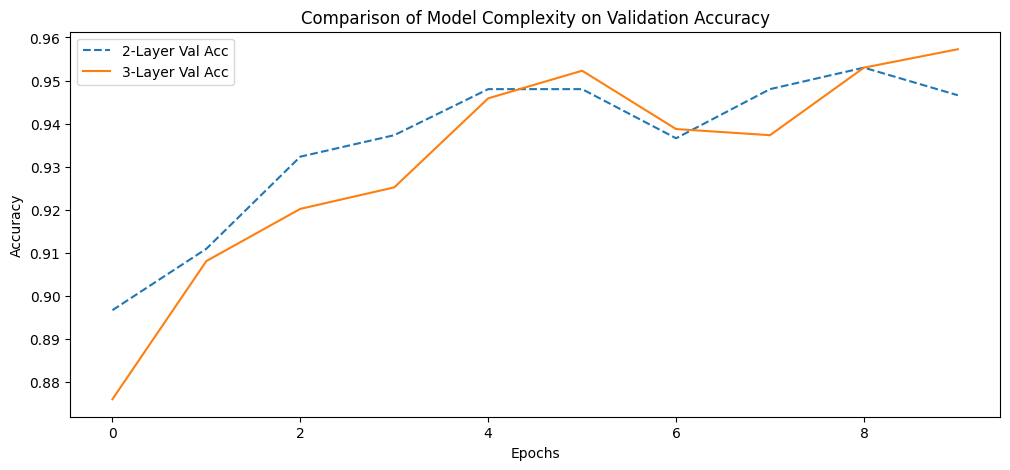

In [13]:
plt.figure(figsize=(12, 5))

# Plot Accuracy for Model 1
plt.plot(history_2_layers.history['val_accuracy'], label='2-Layer Val Acc', linestyle='--')

# Plot Accuracy for Model 2
plt.plot(history_3_layers.history['val_accuracy'], label='3-Layer Val Acc')

plt.title('Comparison of Model Complexity on Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()